## Problem 9: Diabetes

Investigate the model for predicting Diabetes disease progression by adding more explanatory variables to it in addition to bmi and s5.

a) Which variable would you add next? Why?

b) How does adding it affect the model's performance? Compute metrics and compare to having just bmi and s5.

d) Does it help if you add even more variables?

a) I would add the variable `bp` because it comes next in descending order of correlation with the `target` variable.

b) Let's add this variable and compute some metrics.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True)
df = data.frame

X = df[["bmi", "s5", "bp"]]
y = df[["target"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

lm = LinearRegression()
lm.fit(X_train, y_train)

y_train_predict = lm.predict(X_train)
rmse = root_mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)

y_test_predict = lm.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)

print("RMSE on training data: {:.4f}".format(rmse))
print("R2 on training data:   {:.4f}".format(r2))
print("RMSE on test data:     {:.4f}".format(rmse_test))
print("R2 on test data:       {:.4f}".format(r2_test))

RMSE on training data: 55.3261
R2 on training data:   0.4745
RMSE on test data:     56.6256
R2 on test data:       0.4915


Adding variable `bp` in the regression leads to a lower RMSE and better $R^2$ score on the training and test data as compared with only `bmi` and `s5` in the lecture.

c) Adding more variables

In [2]:
X = df[["bmi", "s5", "bp", "s3", "s4"]]
y = df[["target"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

lm = LinearRegression()
lm.fit(X_train, y_train)

y_train_predict = lm.predict(X_train)
rmse = root_mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)

y_test_predict = lm.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)

print("RMSE on training data: {:.4f}".format(rmse))
print("R2 on training data:   {:.4f}".format(r2))
print("RMSE on test data:     {:.4f}".format(rmse_test))
print("R2 on test data:       {:.4f}".format(r2_test))

RMSE on training data: 54.5966
R2 on training data:   0.4882
RMSE on test data:     55.9424
R2 on test data:       0.5037


It looks like adding more variable in the model leads to an even better $R^2$ score and lower RMSE on the training and testing data, but we have to be careful because adding irrelevant variables can lead to overfitting and one must also be careful about introducing multicollinearity. It is important to understand what these variables are.

## Problem 10: Profit prediction

Consider the dataset 50_Startups.csv which contains data for companies' profit etc.

0) Read the dataset into pandas dataframe paying attention to file delimiter.

1) Identify the variables inside the dataset

2) Investigate the correlation between the variables

3) Choose appropriate variables to predict company profit. Justify your choice.

4) Plot explanatory variables against profit in order to confirm (close to) linear dependence

5) Form training and testing data (80/20 split)

6) Train linear regression model with training data

7) Compute RMSE and R2 values for training and testing data separately

We first import the data.

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = os.path.join(os.getcwd(), "data/50_Startups.csv")
df = pd.read_csv(path, delimiter=",")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


We keep numerical data only and then investigate the correlation with a heatmap

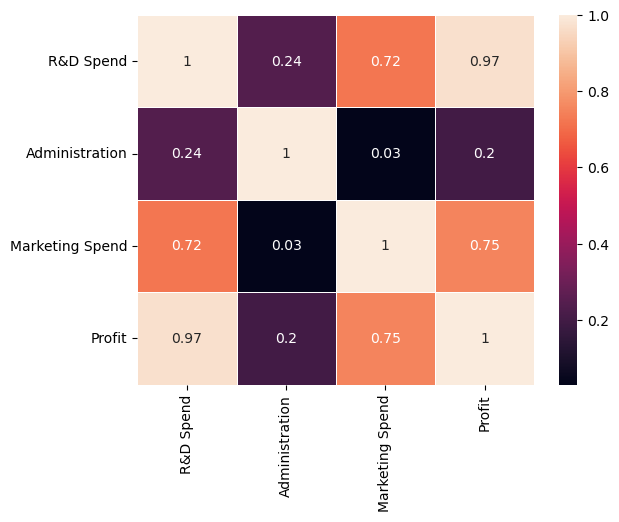

In [4]:
name = list(df.columns)
name.pop(3)
df2 = df[name]
sns.heatmap(df2.corr().round(2).abs(), annot=True, linewidths=0.5)
plt.show()

Variables `R&D Spend` and `Marketing Spend` has high correlation with the target variable `Profit`.

Let's plot them.

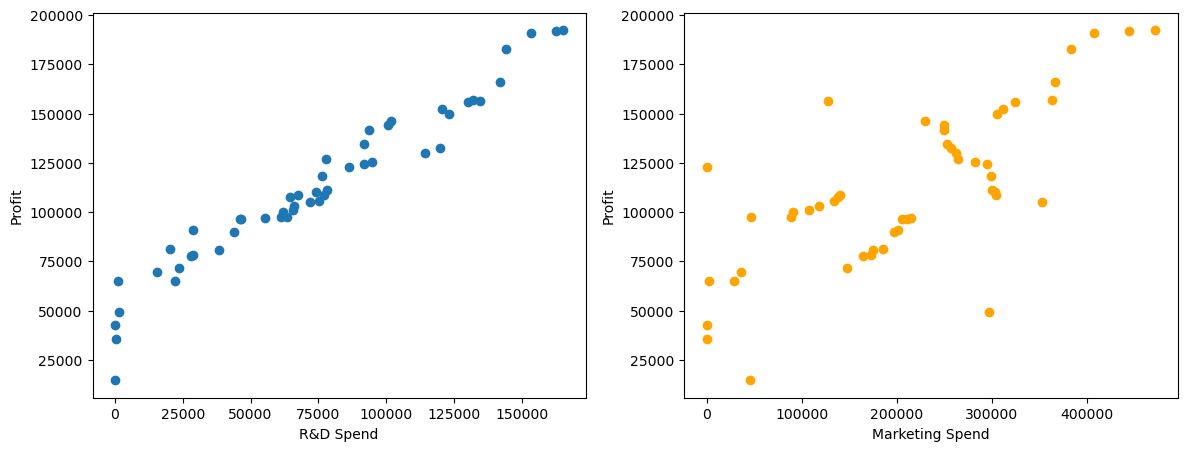

In [5]:
fix, axs = plt.subplots(1,2, figsize = (14,5))

axs[0].scatter(df["R&D Spend"], df["Profit"])
axs[0].set_xlabel("R&D Spend")
axs[0].set_ylabel("Profit")

axs[1].scatter(df["Marketing Spend"], df["Profit"], color='orange')
axs[1].set_xlabel("Marketing Spend")
axs[1].set_ylabel("Profit")
plt.show()

We can see that both variables has a positive linear relationship with the target variable.

Let's prepare the data and train a linear regression model.

In [6]:
X = df2[["R&D Spend", "Marketing Spend"]]
y = df2[["Profit"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

lm = LinearRegression()
lm.fit(X_train, y_train)

y_train_predict = lm.predict(X_train)
rmse = root_mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)

y_test_predict = lm.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)

print("RMSE on training data: {:.4f}".format(rmse))
print("R2 on training data:   {:.4f}".format(r2))
print("RMSE on test data:     {:.4f}".format(rmse_test))
print("R2 on test data:       {:.4f}".format(r2_test))

RMSE on training data: 9358.5831
R2 on training data:   0.9436
RMSE on test data:     7073.8572
R2 on test data:       0.9684


## Problem 11: Car mpg

Consider car performance data from the file Auto.csv.

1) Read the data into pandas dataframe

2) Setup multiple regression X and y to predict 'mpg' of cars using all the variables except 'mpg', 'name' and 'origin'

3) Split data into training and testing sets (80/20 split)

4) Implement both ridge regression and LASSO regression using several values for alpha

5) Search optimal value for alpha (in terms of R2 score) by fitting the models with training data and computing the score using testing data

6) Plot the R2 scores for both regressors as functions of alpha

7) Identify, as accurately as you can, the value for alpha which gives the best score

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error, r2_score

path = os.path.join(os.getcwd(), "data/Auto.csv")
df = pd.read_csv(path)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Let's prepare the data

In [8]:
var = "cylinders	displacement	horsepower	weight	acceleration	year".split()
X = df[var]
y = df.mpg

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

Let's train a ridge regression for different values of alpha and find the one that gives the best $R^2$ score

R2 max: 0.7717099458919385,  Alpha: 92


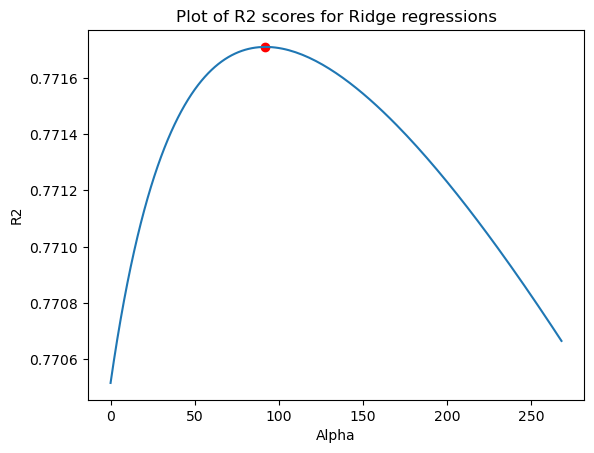

In [9]:
r2_ridge = []
maxr2_ridge = 0; max_alp_ridge = 0
alphas = np.arange(0, 270, 2)
for alp in alphas:
    rr = Ridge(alpha = alp)
    rr.fit(X_train, y_train)
    r2_test = r2_score(y_test, rr.predict(X_test))
    r2_ridge.append(r2_test)
    if r2_test > maxr2_ridge: maxr2_ridge = r2_test; max_alp_ridge = alp

print("R2 max: {},  Alpha: {}".format(maxr2_ridge, max_alp_ridge))
plt.scatter(max_alp_ridge, maxr2_ridge, c = 'r')
plt.plot(alphas,r2_ridge)
plt.title("Plot of R2 scores for Ridge regressions")
plt.xlabel("Alpha")
plt.ylabel("R2")

plt.show()

Let's train a LASSO regression for different values of alpha and find the one that gives the best $R^2$ score

R2 max: 0.7750801519700079,  Alpha: 0.28


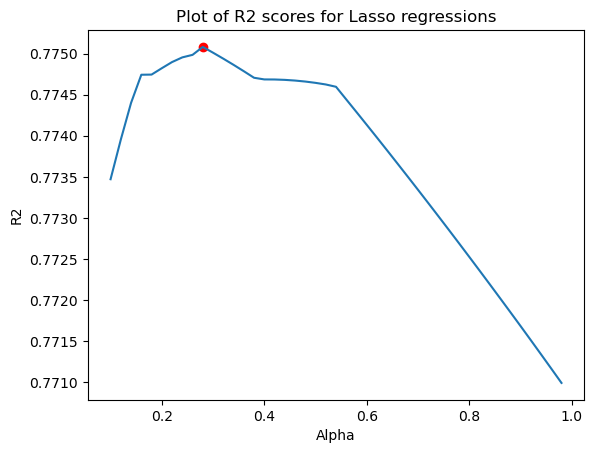

In [10]:
r2_lasso = []
maxr2_lasso = 0; max_alp_ridge = 0
alphas = np.arange(0.1, 1, 0.02)
for alp in alphas:
    lr = Lasso(alpha = alp)
    lr.fit(X_train, y_train)
    r2_test = r2_score(y_test, lr.predict(X_test))
    r2_lasso.append(r2_test)
    if r2_test > maxr2_lasso: maxr2_lasso = r2_test; max_alp_lasso = alp

print("R2 max: {},  Alpha: {}".format(maxr2_lasso, max_alp_lasso))
plt.scatter(max_alp_lasso, maxr2_lasso, c = 'r')
plt.plot(alphas,r2_lasso)
plt.title("Plot of R2 scores for Lasso regressions")
plt.xlabel("Alpha")
plt.ylabel("R2")
plt.show()